In [1]:
import pandas as pd

In [2]:
data_train = pd.read_csv("data/flight_survey_train.csv")
data_test = pd.read_csv("data/flight_survey_test.csv")

In [3]:
df_train = pd.DataFrame(data_train)
df_test = pd.DataFrame(data_test)

In [4]:
df_train

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
0       Eco Plus              460                      3   
1       Business              235                      3   
2       Business             1142                      2   
3       Business              562                      2   
4       Business              214                      3   
...          ...              ...                    ...   
103899       Eco              192                      2   
103900  Business             2347                      4   
103901  Business             1995                      1   
103902       Eco             1000                      1   
103903  Business             1723                      1   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                       4  ...                       5   
1                                       2  ...                       1   
2                                       2  ...                       5   
3                                       5  ...                       2   
4                                       3  ...                       3   
...                                   ...  ...                     ...   
103899                                  1  ...                       2   
103900                                  4  ...                       5   
103901                                  1  ...                       4   
103902                                  1  ...                       1   
103903                                  3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   
4                      3            3                           0   
...                  ...          ...                         

In [5]:
data_train.shape

(103904, 25)

In [6]:
df_test.shape

(25976, 25)

In [7]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.shape

(129880, 25)

In [8]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [10]:
df = df.drop(columns=["Unnamed: 0", "id"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

In [12]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [13]:
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].mean())

In [14]:
df["Arrival Delay in Minutes"].isnull().sum()

0

In [15]:
df["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64

<Axes: xlabel='satisfaction', ylabel='count'>

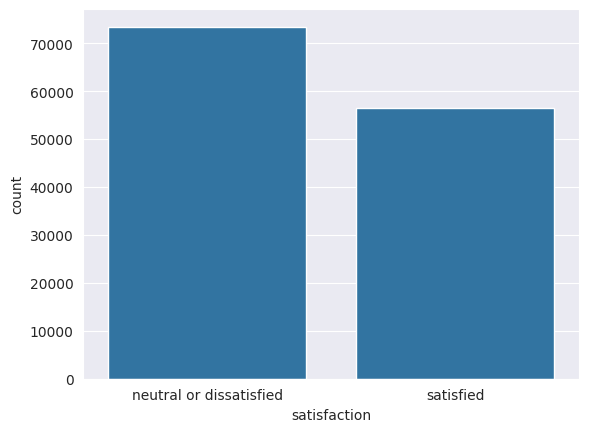

In [16]:
import seaborn as sns

sns.countplot(df, x="satisfaction")

<Axes: xlabel='Gender', ylabel='count'>

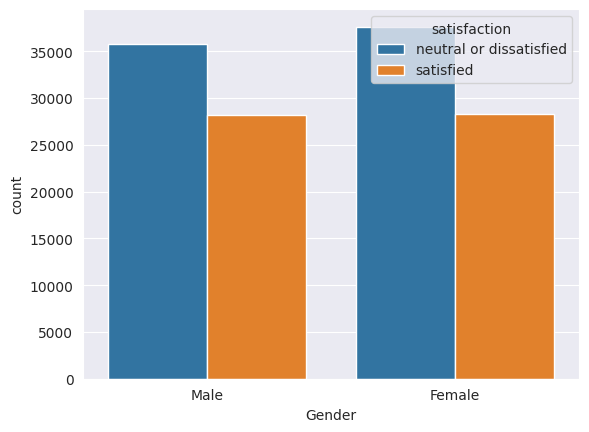

In [17]:
sns.countplot(df, x="Gender", hue="satisfaction")

<Axes: xlabel='Type of Travel', ylabel='count'>

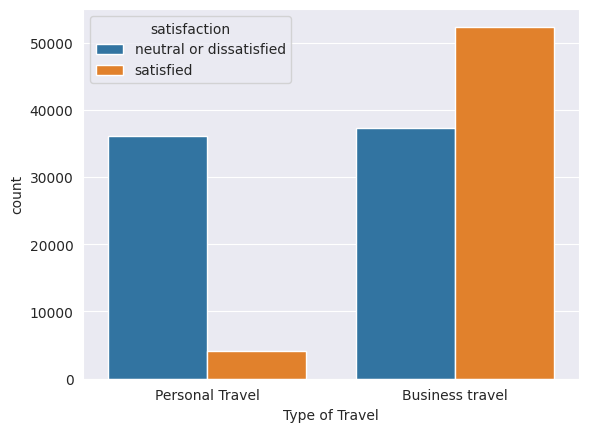

In [18]:
sns.countplot(df, x="Type of Travel", hue="satisfaction")

<Axes: xlabel='Seat comfort', ylabel='count'>

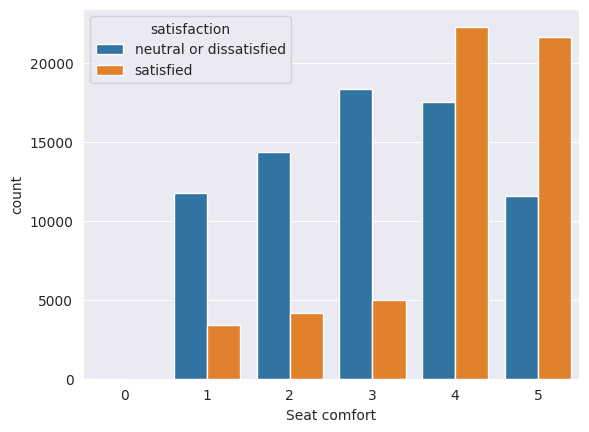

In [19]:
sns.countplot(df, x="Seat comfort", hue="satisfaction")

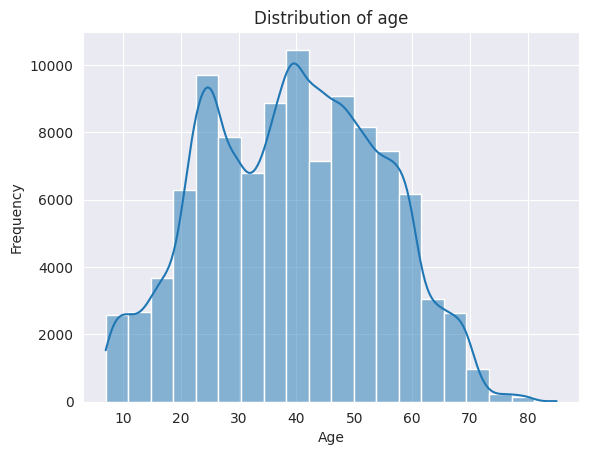

In [20]:
import matplotlib.pyplot as plt

sns.histplot(df_train["Age"], bins=20, kde=True)
plt.title("Distribution of age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

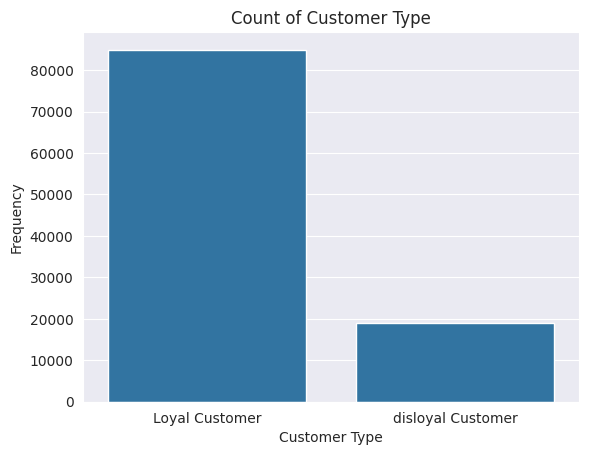

In [21]:
sns.countplot(df_train, x="Customer Type")
plt.title("Count of Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Frequency")
plt.show()

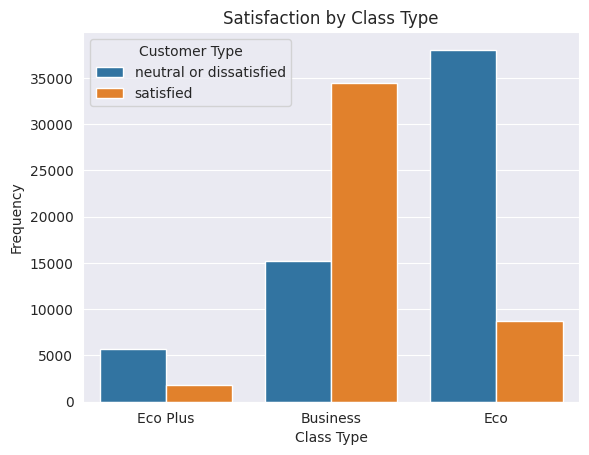

In [22]:
sns.countplot(df_train, x="Class", hue="satisfaction")
plt.title("Satisfaction by Class Type")
plt.xlabel("Class Type")
plt.ylabel("Frequency")
plt.legend(title="Customer Type")
plt.show()

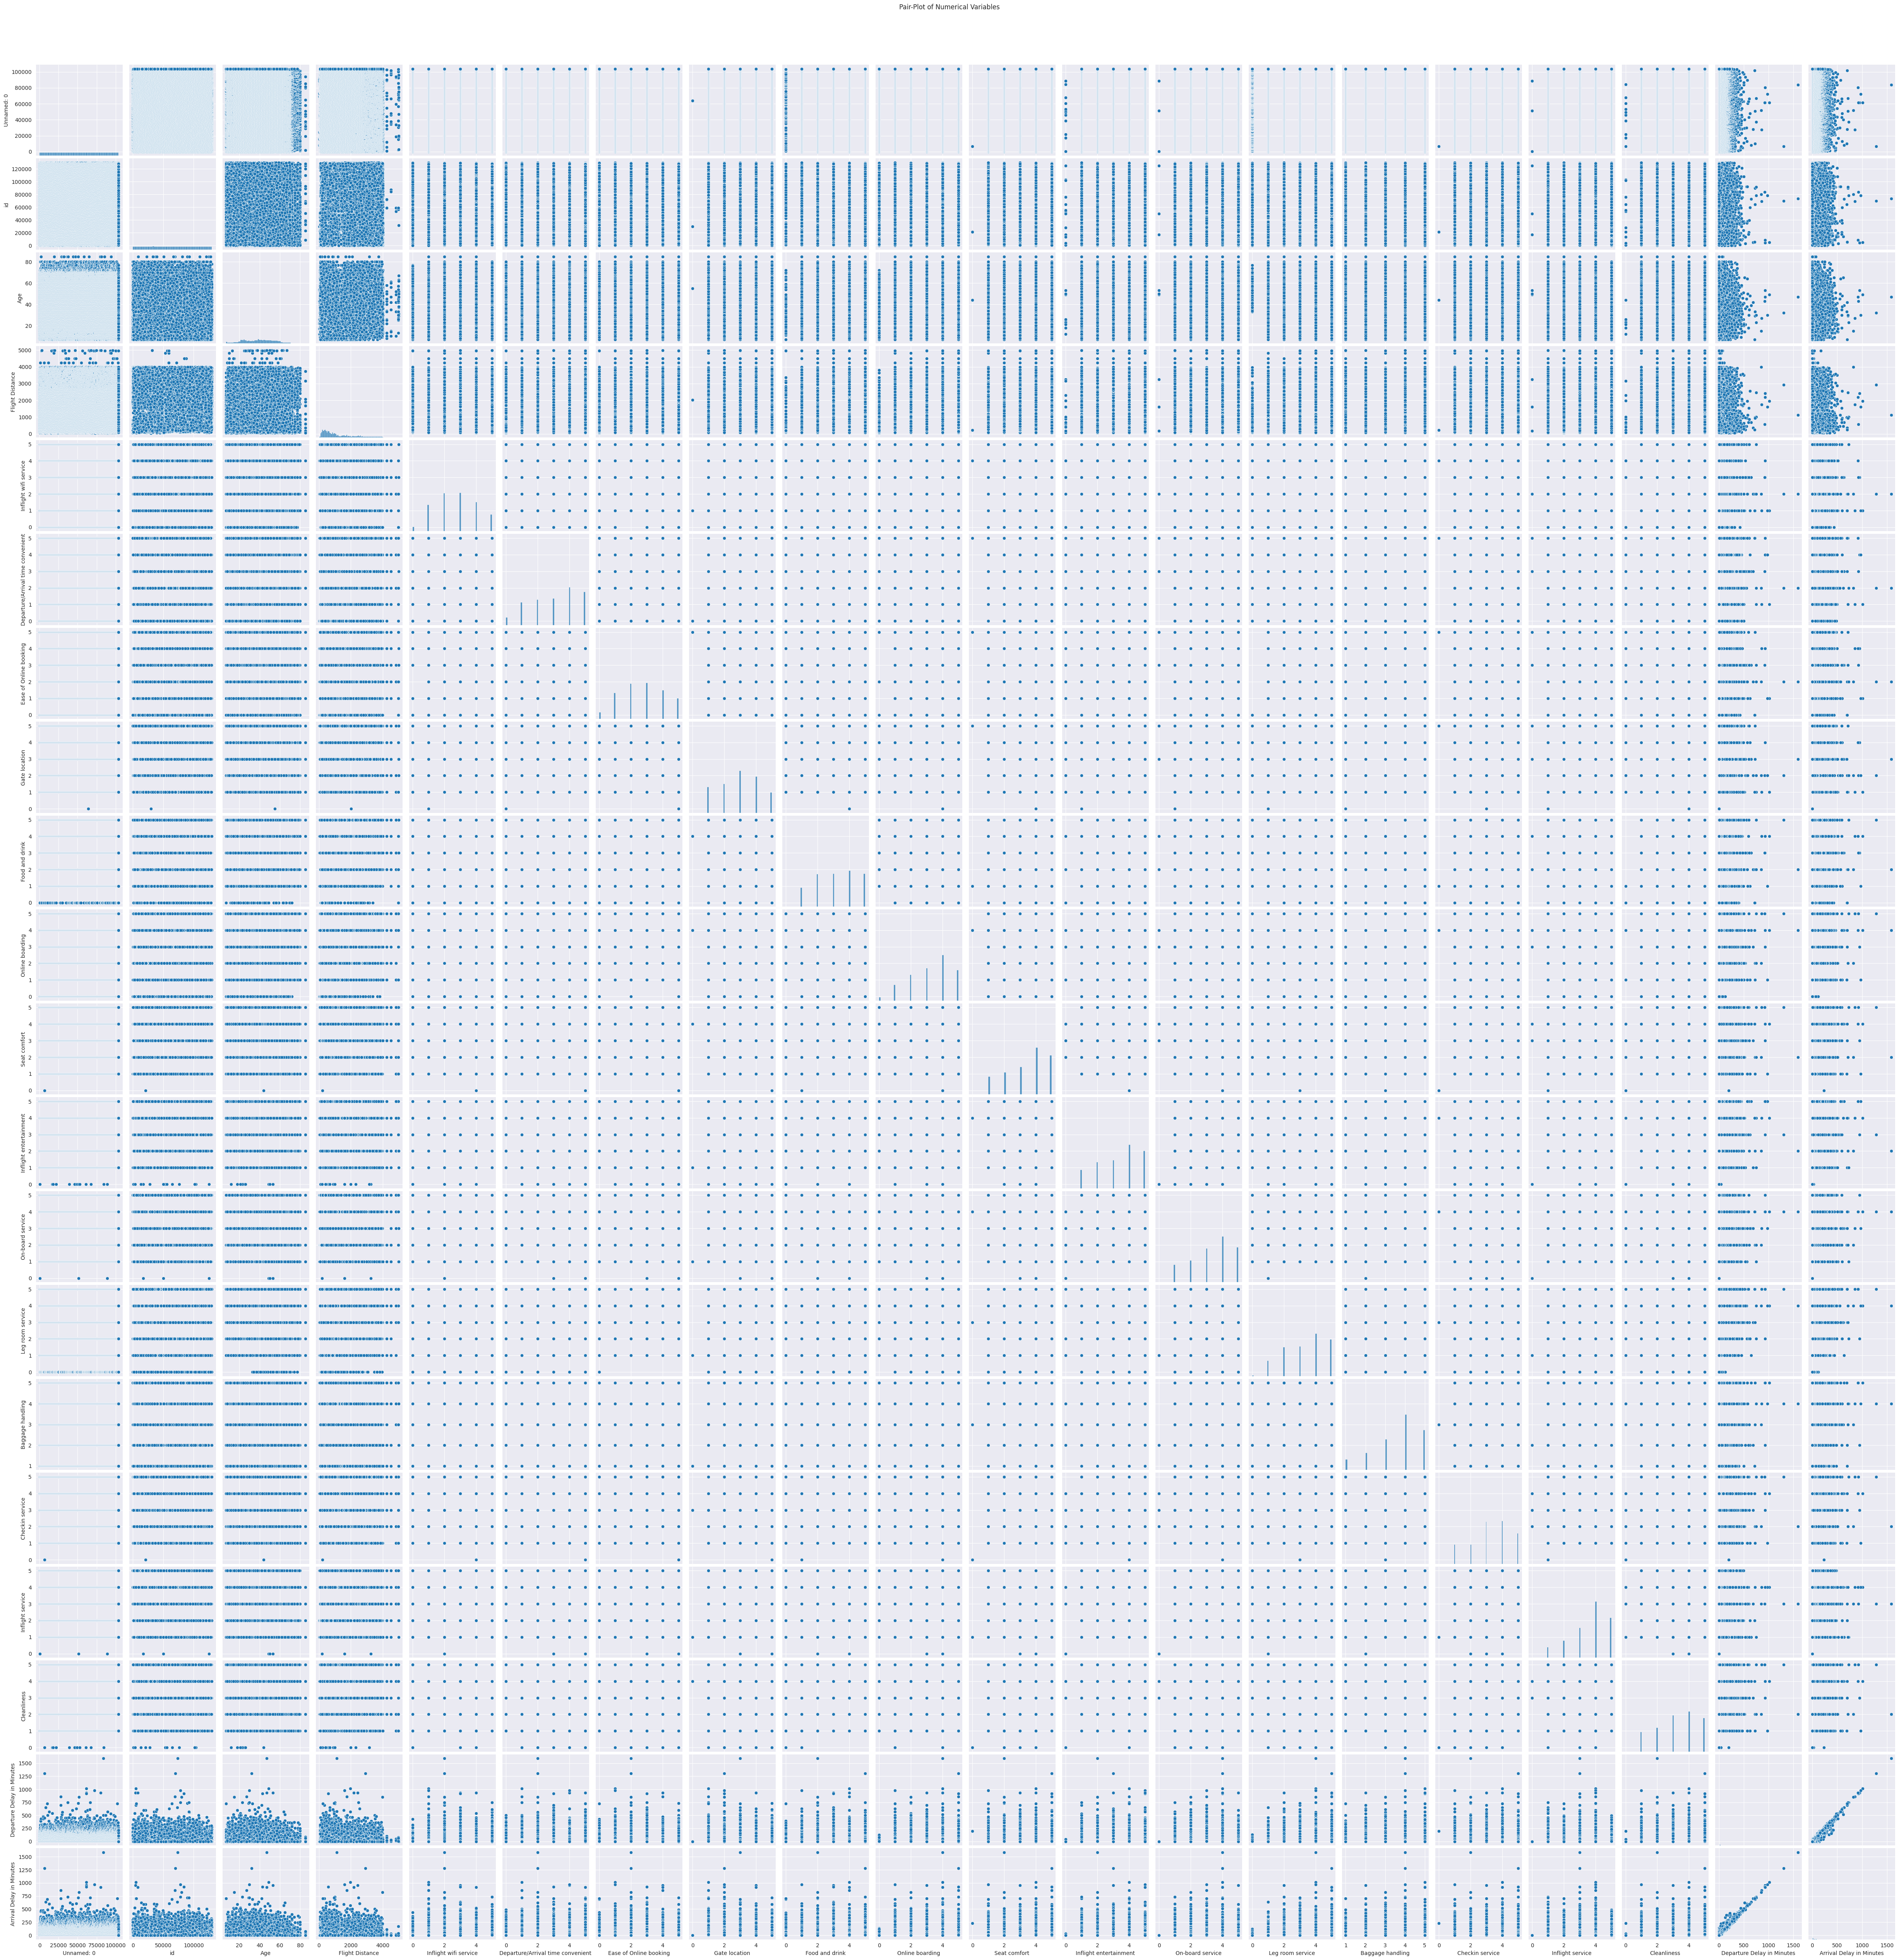

In [23]:
numerical_vars = df_train.select_dtypes(include=["int64", "float64"])
sns.pairplot(numerical_vars)
plt.suptitle("Pair-Plot of Numerical Variables", y=1.02)
plt.show()

<Axes: xlabel='Cleanliness'>

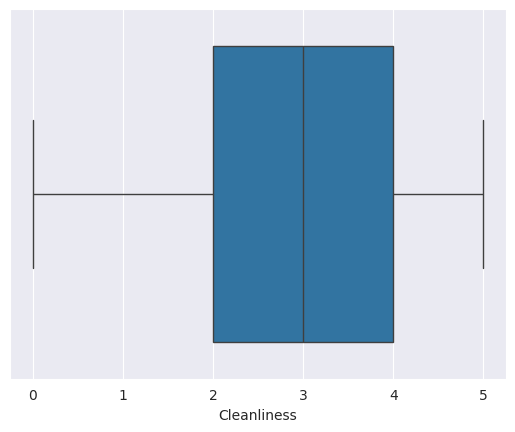

In [24]:
sns.boxplot(df, x="Cleanliness")

<Axes: xlabel='Departure Delay in Minutes'>

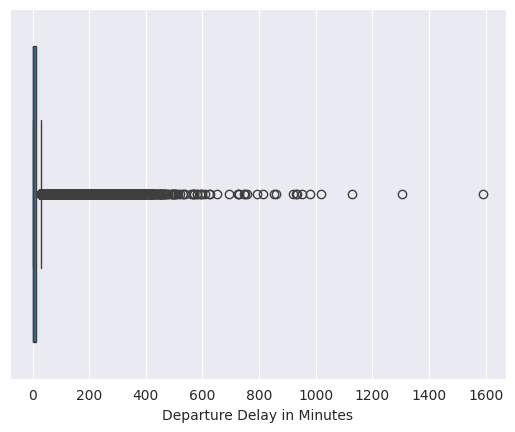

In [25]:
sns.boxplot(df, x="Departure Delay in Minutes")

<Axes: xlabel='Arrival Delay in Minutes'>

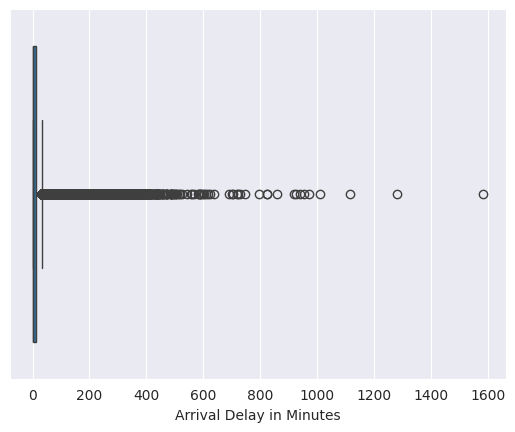

In [26]:
sns.boxplot(df, x="Arrival Delay in Minutes")

In [27]:
import numpy as np

features = ["Departure Delay in Minutes", "Arrival Delay in Minutes"]
threshold = 3
index_list = []

for f in features:
    mean = np.mean(df[f])
    std = np.std(df[f])
    z_score = (df[f] - mean) / std
    outliers = df[abs(z_score) > threshold]
    index_list.extend(outliers.index)
    print(f"Outliers based on Z-Score for feature {f}:", len(outliers))

Outliers based on Z-Score for feature Departure Delay in Minutes: 2748
Outliers based on Z-Score for feature Arrival Delay in Minutes: 2742


In [28]:
df = df.drop(index=index_list).reset_index(drop=True)

In [29]:
df.shape

(126807, 23)

In [30]:
categorical_feature = df.select_dtypes(include=["object"]).columns

In [31]:
categorical_feature

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [32]:
from sklearn.preprocessing import LabelEncoder

len_coders = {}

for col in categorical_feature:
    len_coders[col] = LabelEncoder()
    df[col] = len_coders[col].fit_transform(df[col])

In [33]:
df

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0            1              0   13               1      2              460   
1            1              1   25               0      0              235   
2            0              0   26               0      0             1142   
3            0              0   25               0      0              562   
4            1              0   61               0      0              214   
...        ...            ...  ...             ...    ...              ...   
126802       1              1   34               0      0              526   
126803       1              0   23               0      0              646   
126804       0              0   17               1      1              828   
126805       1              0   14               0      0             1127   
126806       0              0   42               1      1              264   

        Inflight wifi service  Departure/Arrival time convenient  \
0                           3                                  4   
1                           3                                  2   
2                           2                                  2   
3                           2                                  5   
4                           3                                  3   
...                       ...                                ...   
126802                      3                                  3   
126803                      4                                  4   
126804                      2                                  5   
126805                      3                                  3   
126806                      2                                  5   

        Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                            3              1  ...                       5   
1                            3              3  ...                       1   
2                            2              2  ...                       5   
3                            5              5  ...                       2   
4                            3              3  ...                       3   
...                        ...            ...  ...                     ...   
126802                       3              1  ...                       4   
126803                       4              4  ...                       4   
126804                       1              5  ...                       2   
126805                       3              3  ...                       4   
126806                       2              5  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
126802                 3                 2                 4                4   
126803                 4                 5                 5                5   
126804                 4                 3                 4                5   
126805                 3                 2                 5                4   
126806                 1                 2                 1                1   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   

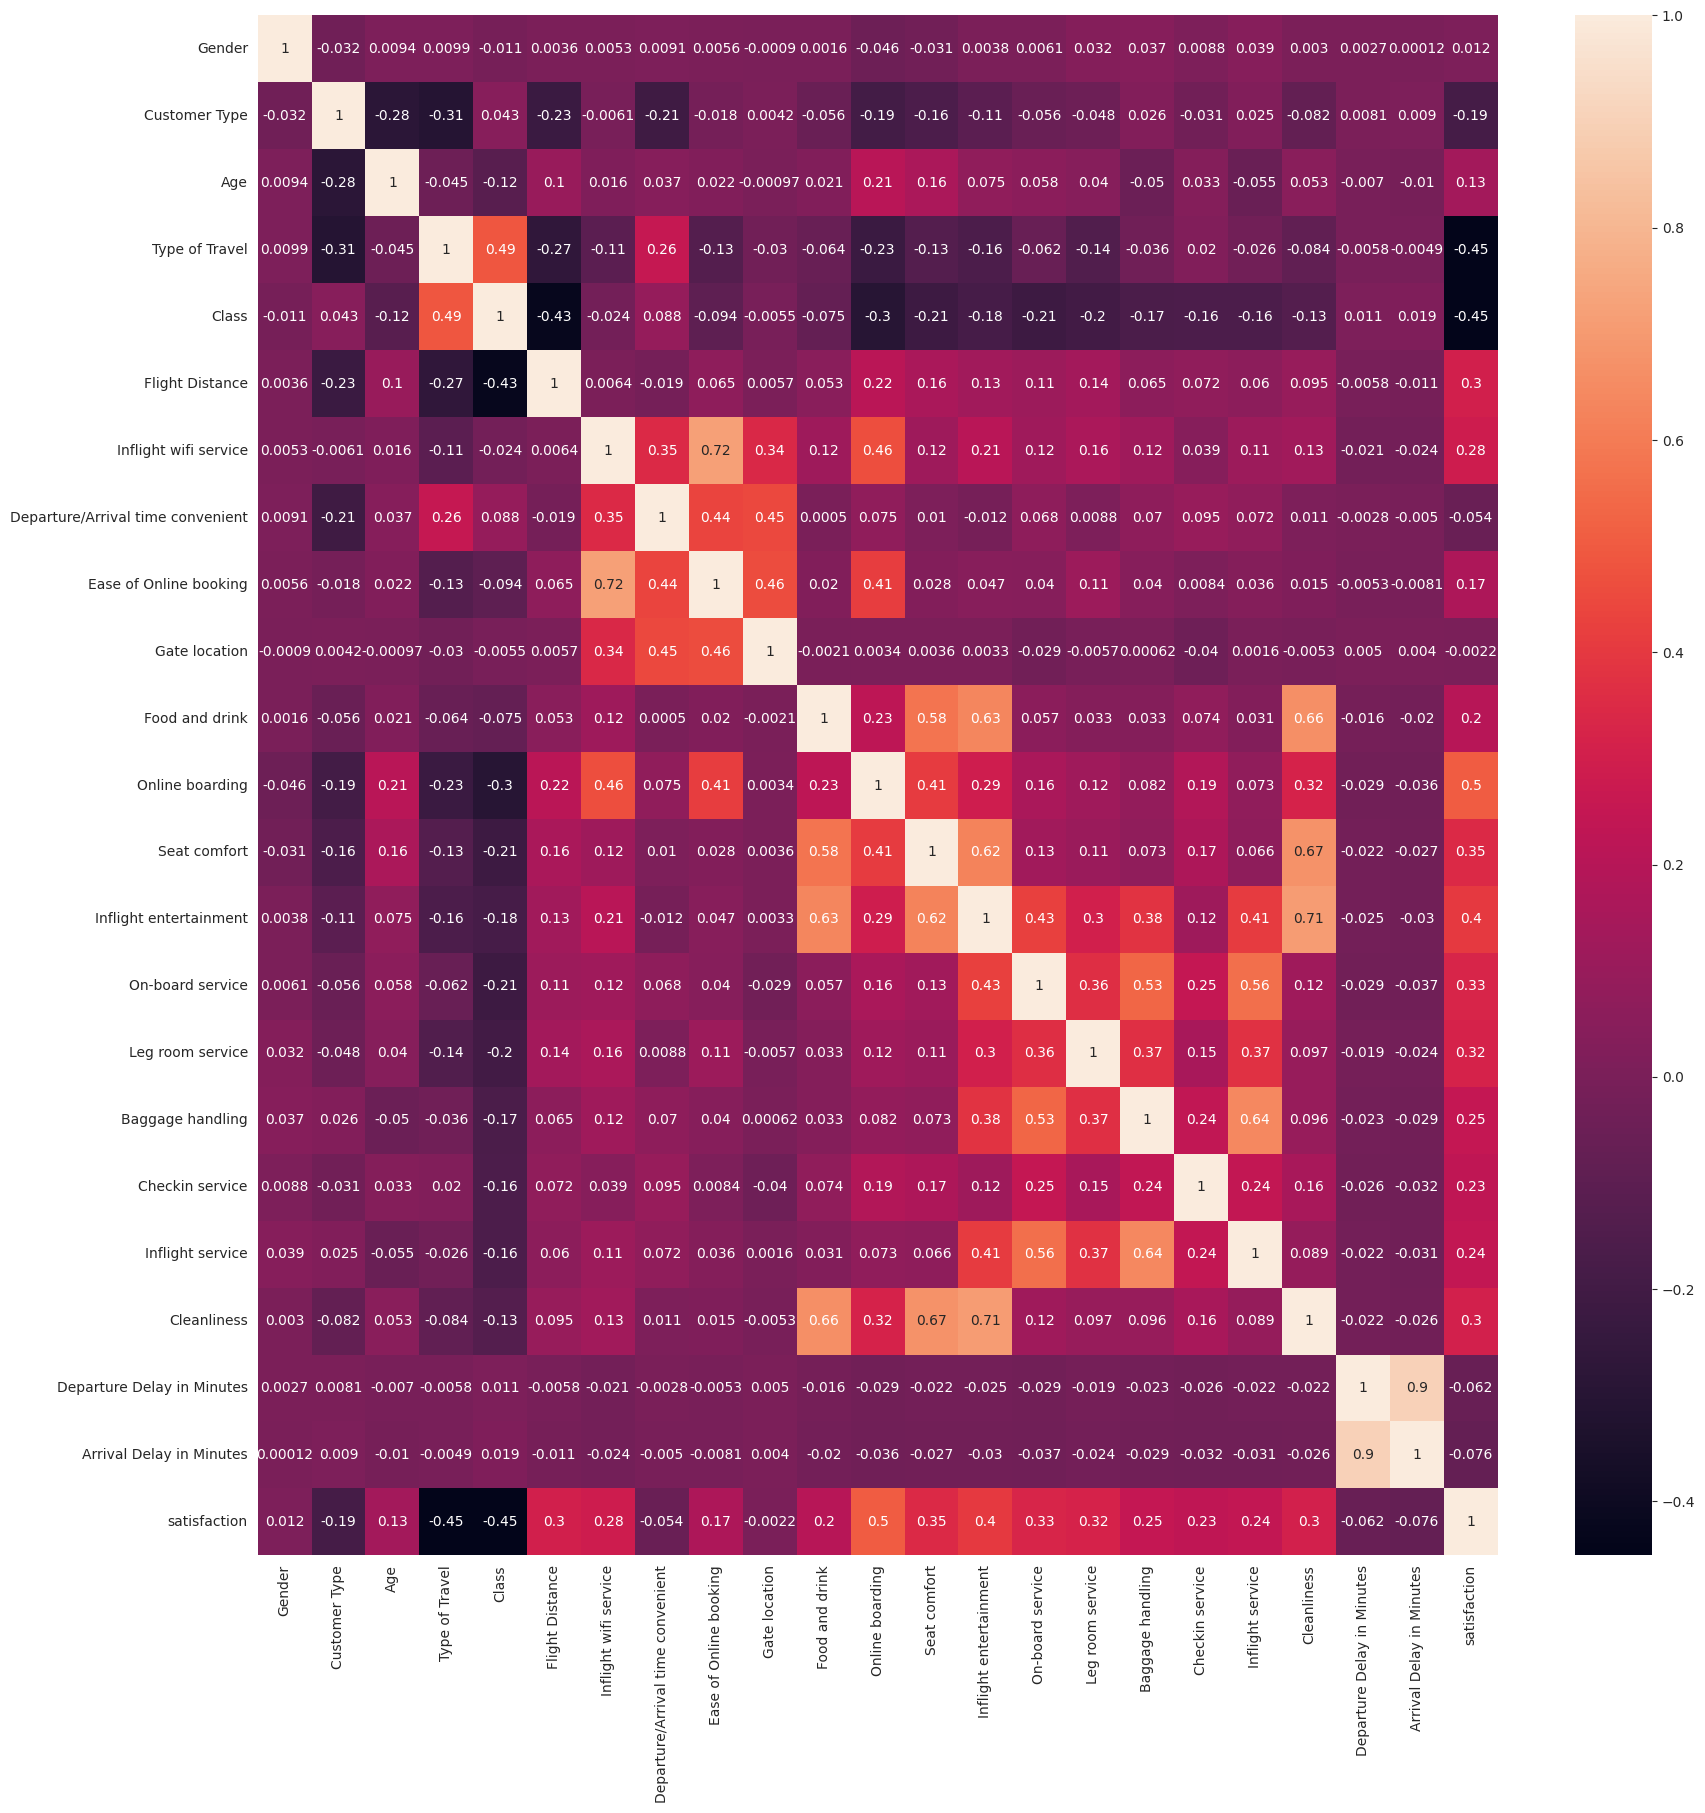

In [34]:
corr = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=True)
plt.show()

In [35]:
abs(corr["satisfaction"]).sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.503618
Type of Travel                       0.450822
Class                                0.448727
Inflight entertainment               0.400889
Seat comfort                         0.346722
On-board service                     0.328036
Leg room service                     0.316198
Cleanliness                          0.304285
Flight Distance                      0.298348
Inflight wifi service                0.282625
Baggage handling                     0.249946
Inflight service                     0.243479
Checkin service                      0.232740
Food and drink                       0.201006
Customer Type                        0.186825
Ease of Online booking               0.168880
Age                                  0.133854
Arrival Delay in Minutes             0.076007
Departure Delay in Minutes           0.062082
Departure/Arrival time convenient    0.054124
Gender                            

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df.drop("satisfaction", axis=1)
y = df["satisfaction"]

In [38]:
X

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0            1              0   13               1      2              460   
1            1              1   25               0      0              235   
2            0              0   26               0      0             1142   
3            0              0   25               0      0              562   
4            1              0   61               0      0              214   
...        ...            ...  ...             ...    ...              ...   
126802       1              1   34               0      0              526   
126803       1              0   23               0      0              646   
126804       0              0   17               1      1              828   
126805       1              0   14               0      0             1127   
126806       0              0   42               1      1              264   

        Inflight wifi service  Departure/Arrival time convenient  \
0                           3                                  4   
1                           3                                  2   
2                           2                                  2   
3                           2                                  5   
4                           3                                  3   
...                       ...                                ...   
126802                      3                                  3   
126803                      4                                  4   
126804                      2                                  5   
126805                      3                                  3   
126806                      2                                  5   

        Ease of Online booking  Gate location  ...  Seat comfort  \
0                            3              1  ...             5   
1                            3              3  ...             1   
2                            2              2  ...             5   
3                            5              5  ...             2   
4                            3              3  ...             5   
...                        ...            ...  ...           ...   
126802                       3              1  ...             4   
126803                       4              4  ...             4   
126804                       1              5  ...             2   
126805                       3              3  ...             4   
126806                       2              5  ...             2   

        Inflight entertainment  On-board service  Leg room service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
126802                       4                 3                 2   
126803                       4                 4                 5   
126804                       2                 4                 3   
126805                       4                 3                 2   
126806                       1                 1                 2   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                      4                4                 5            5   
1                      3                1                 4            1   
2                      4                4                 4            5   
3                      3                1                 4            2   
4                      4                3                 3            3   
...                  ...              ...               ...          ...   
126802                 4                4                 5     

In [39]:
y

0         0
1         0
2         1
3         0
4         1
         ..
126802    0
126803    1
126804    0
126805    1
126806    0
Name: satisfaction, Length: 126807, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [41]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(512, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(Adam(), "binary_crossentropy", metrics=["accuracy"])

2025-07-02 11:20:57.010895: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-02 11:20:57.628524: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-02 11:21:05.008409: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-07-02 11:21:05.259018: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to 

In [43]:
from keras.callbacks import EarlyStopping

es = EarlyStopping("val_accuracy", mode="max", patience=10)

In [44]:
ANN_clf = model.fit(X_train, y_train, epochs=50, callbacks=[es], validation_split=0.2, batch_size=8192)

Epoch 1/50


2025-07-02 11:21:21.988092: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2025-07-02 11:21:22.080160: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x560cc3741430 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-07-02 11:21:22.080247: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-07-02 11:21:22.181727: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-07-02 11:21:22.469244: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2025-07-02 11:21:22.880456: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:231] Falling back to the CUDA driver for PTX compilation; ptxas d

10/10 [==============================] - 11s 61ms/step - loss: 0.4569 - accuracy: 0.8070 - val_loss: 0.3351 - val_accuracy: 0.8735
Epoch 2/50
10/10 [==============================] - 0s 27ms/step - loss: 0.3119 - accuracy: 0.8789 - val_loss: 0.2560 - val_accuracy: 0.9036
Epoch 3/50
10/10 [==============================] - 0s 26ms/step - loss: 0.2589 - accuracy: 0.8988 - val_loss: 0.2176 - val_accuracy: 0.9177
Epoch 4/50
10/10 [==============================] - 0s 25ms/step - loss: 0.2224 - accuracy: 0.9117 - val_loss: 0.1901 - val_accuracy: 0.9239
Epoch 5/50
10/10 [==============================] - 0s 25ms/step - loss: 0.2020 - accuracy: 0.9192 - val_loss: 0.1735 - val_accuracy: 0.9296
Epoch 6/50
10/10 [==============================] - 0s 28ms/step - loss: 0.1891 - accuracy: 0.9237 - val_loss: 0.1644 - val_accuracy: 0.9344
Epoch 7/50
10/10 [==============================] - 0s 21ms/step - loss: 0.1781 - accuracy: 0.9277 - val_loss: 0.1543 - val_accuracy: 0.9380
Epoch 8/50
10/10 [=====

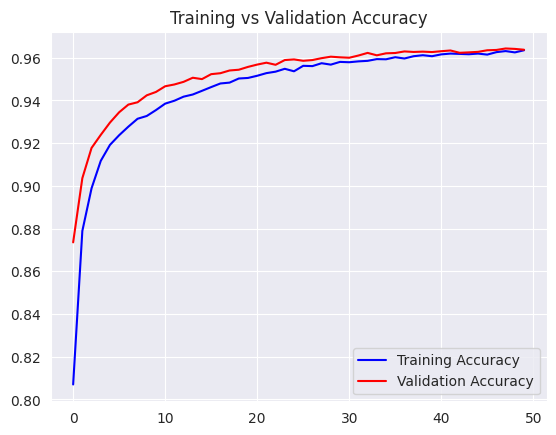

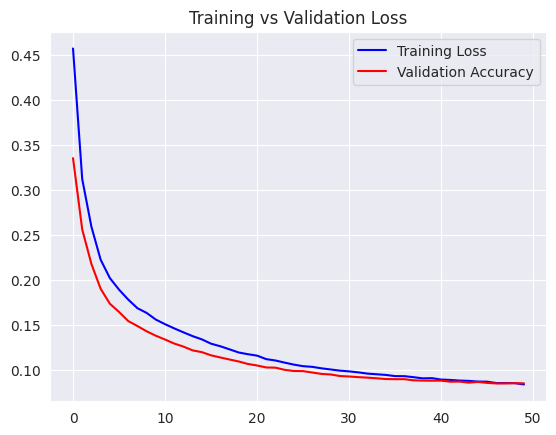

In [45]:
acc = ANN_clf.history["accuracy"]
val_acc = ANN_clf.history["val_accuracy"]
loss = ANN_clf.history["loss"]
val_loss = ANN_clf.history["val_loss"]
epochs = range(len(acc))

plt.plot(epochs, acc, "blue", label="Training Accuracy")
plt.plot(epochs, val_acc, "red", label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "blue", label="Training Loss")
plt.plot(epochs, val_loss, "red", label="Validation Accuracy")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

In [46]:
y_pred = model.predict(X_test, batch_size=8192)

4/4 [==============================] - 0s 12ms/step


In [47]:
y_pred_labels = (y_pred > 0.5).astype(int)

In [48]:
from sklearn.metrics import accuracy_score, classification_report

print("Test accuracy:", accuracy_score(y_test, y_pred_labels))
print(classification_report(y_test, y_pred_labels))

Test accuracy: 0.9628578187840076
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14319
           1       0.97      0.94      0.96     11043

    accuracy                           0.96     25362
   macro avg       0.96      0.96      0.96     25362
weighted avg       0.96      0.96      0.96     25362



In [49]:
model.get_weights()

[array([[ 0.02522292, -0.01350212, -0.08368322, ...,  0.08917528,
          0.00025384,  0.03038712],
        [-0.06220714, -0.12363972,  0.10919486, ..., -0.02773404,
         -0.03535236,  0.00086851],
        [-0.03443089,  0.02069923,  0.05729766, ..., -0.03058989,
         -0.05020198,  0.03799253],
        ...,
        [ 0.03113464,  0.01282192, -0.02784842, ..., -0.01114327,
          0.0298038 ,  0.0135215 ],
        [-0.08220001,  0.05261854,  0.02051174, ..., -0.0474488 ,
          0.00606742,  0.07565367],
        [ 0.00690597, -0.05791379, -0.02073772, ..., -0.03633314,
          0.05047938, -0.06421947]], dtype=float32),
 array([-9.67120454e-02, -1.09694175e-01,  1.65574043e-03, -9.31586102e-02,
         4.13262770e-02, -3.50220352e-02, -1.05420344e-01,  4.00186814e-02,
        -1.10026427e-01, -1.27166659e-01, -8.09337422e-02, -3.17489617e-02,
        -2.54311822e-02, -4.12698425e-02, -1.08402550e-01,  1.43336030e-02,
        -1.99963083e-03, -4.18177843e-02,  1.81650501e